In [204]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [206]:
df=pd.read_csv("NSE.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [208]:
ndf = df [['Date', 'Close']]
ndf.dtypes

Date      object
Close    float64
dtype: object

In [210]:
ndf["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
ndf.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [212]:
#making datetime as index
ndf.index = ndf['Date']

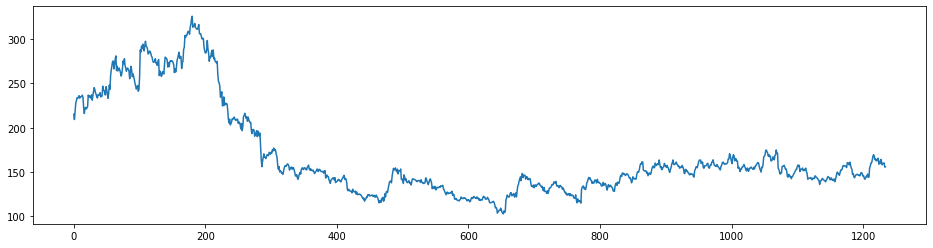

In [214]:
plt.figure(figsize=(16,4))
plt.title = "time and close price graph"
plt.xlabel = "Time Stamp"
plt.ylabel = "Close prices"
plt.plot(df["Close"])

In [215]:
ndf = ndf.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(ndf)),columns=['Date','Close'])
for i in range(len(data)):
    data["Date"][i] = ndf['Date'][i]
    data["Close"][i] = ndf['Close'][i]
data.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [217]:
scaler = MinMaxScaler(feature_range=(0 , 5))
data.index = data["Date"]
data.drop("Date",axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)

x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [218]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [220]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

140/140 - 3s - loss: 0.0020


In [221]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

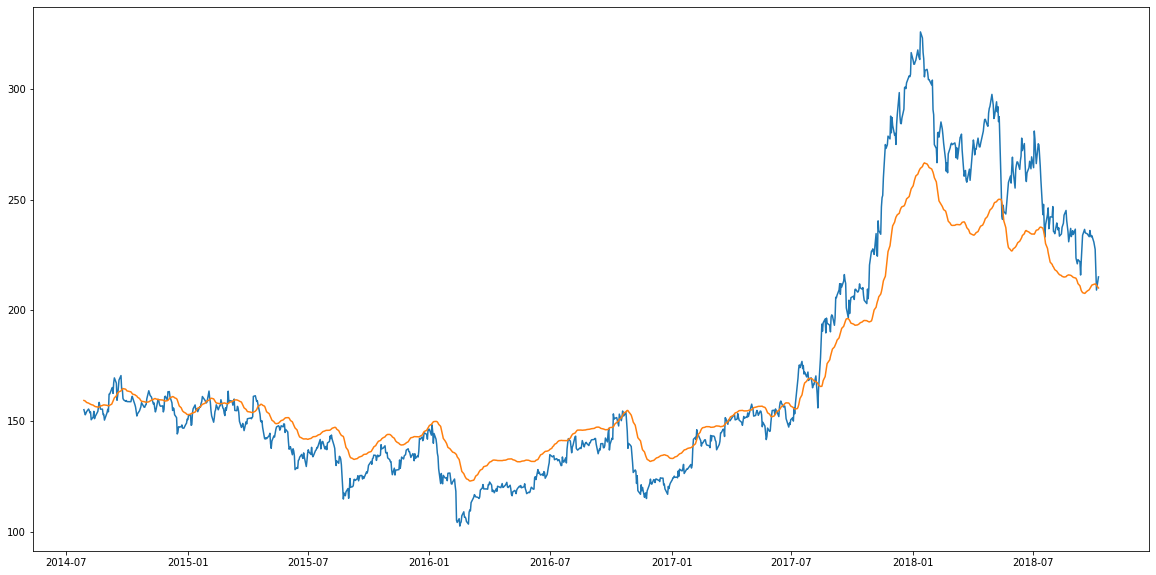

In [229]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.xlabel ="Time Stamp" 
plt.ylabel ="Close values ie predicted and valid"
plt.plot(valid_data["Close"])
plt.plot(valid_data["Predictions"])
plt.show()

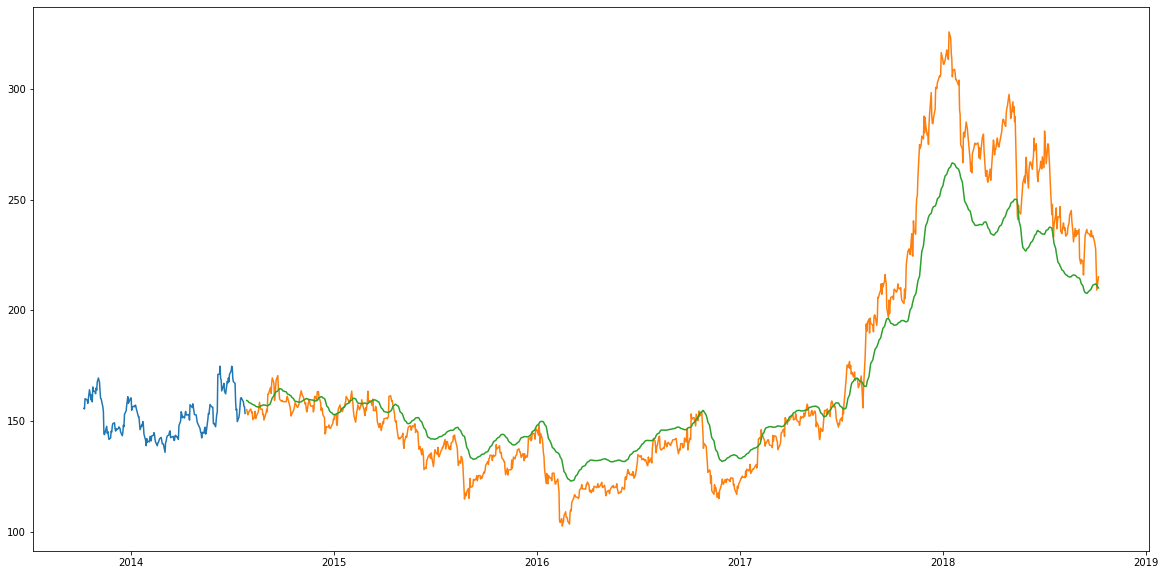

In [231]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])
plt.show()

In [244]:
l = [1,2,3,4,5,6,7,8,9,10]
print(type(valid_data["Close"][0]))

<class 'numpy.float64'>
